# Data Mining - Clustering
### by Nathan Dilla & John Haviland
### Feb. 18, 2024


<h4> Nathan's video: https://www.loom.com/share/1747e4809b084cb9b8d445159f0aa299?sid=d7ac8937-6d9d-438c-93b0-450a95f81bcb </h4>

<h4> John's video: https://www.loom.com/share/a7b6b2c3745746d9a9bdc557d86dac46?sid=0ca39cc3-d796-489e-a7fe-238d4b15040d </h4>

# Part 1

### Clustering
How the Algorithm Works: Clustering is a type of unsupervised learning algorithm that groups a set of objects in such a way that objects in the same "cluster" are more similar to each other than to those in other clusters. The process begins with the initialization phase, where the number of clusters is defined, and initial centroids are either randomly selected or assigned. The algorithm then iterates through two main steps: the assignment step, where each data point is assigned to the nearest cluster based on a distance metric (usually Euclidean distance), and the update step, where the centroids of the clusters are recalculated based on the data points assigned to each cluster. This process repeats until a stopping criterion is met, such as a minimal change in centroid position or a set number of iterations.
#

#
Strengths:
#
    - Can reveal natural groupings or patterns within a data set that might not be immediately apparent.
    - Does not require prior knowledge of the number of clusters.
    - Versatile and can be applied to a wide range of data types.
#
Weaknesses:
#
    - The need to specify the number of clusters in advance for algorithms like K-means can be limiting if not known.
    - Sensitive to the initial choice of centroids and may converge to local optima.
    - High-dimensional data can cause a degradation in performance.
#
Real life example: Companies can analyze purchasing behavior to group customers into clusters based on similarities in their shopping habits, preferences, and demographic information. This can help tailor marketing strategies to each customer segment more effectively.

Cardoso,Margarida. (2014). Wholesale customers. UCI Machine Learning Repository. https://doi.org/10.24432/C5030X.


### Association
How the Algorithm Works: Association rule learning is a rule-based machine learning method for discovering interesting relations between variables in large databases. It aims to identify strong rules discovered in databases using some measures of interestingness, based on the concept of strong support and confidence levels. The classic algorithm for association rule mining is Apriori, which operates by generating candidate itemsets and then testing them against the data to find the most frequent ones. It iterates over the dataset, progressively increasing the size of itemsets to find all rules that satisfy the user-defined minimum support and confidence thresholds.
#

#
Strengths:
#
    - Useful for discovering interesting relationships hidden in large datasets.
    - Can generate rules that are easy to understand and interpret.
    - Widely used in market basket analysis, cross-selling strategies, and catalog design.
#
Weaknesses:
#
    - Can generate a large number of rules, making it difficult to identify the most meaningful ones.
    - Performance issues with very large datasets due to the exhaustive search for all possible rule combinations.
    - Sensitive to the thresholds set for support and confidence.
#
Real life example: Retail use association rule learning to analyze customer purchase patterns by examining the combinations of products that frequently occur together in transactions. This type of analysis can help retailers to optimize product placement, cross-sell strategies, and promote items effectively.

Chen,Daqing. (2015). Online Retail. UCI Machine Learning Repository. https://doi.org/10.24432/C5BW33.




### Correlation Analysis
How the Algorithm Works: Correlation analysis measures the relationship between two or more variables to understand how they may vary together. The most common method to perform correlation analysis is using Pearson's correlation coefficient for linear relationships, quantifying the degree to which a change in one variable corresponds with a change in another. The coefficient ranges from -1 to 1, where 1 means a perfect positive correlation, -1 means a perfect negative correlation, and 0 means no linear correlation. Spearman's rank correlation is used for non-linear relationships, assessing how well the relationship between two variables can be described using a monotonic function.
#

#
Strengths:
#
    - Simple to interpret & calculate.
    - Can help in identifying potential variables for further analysis or predictive modeling.
    - Can provide a quantitative measure of the strength and direction of the relationship between two variables.
#
Weaknesses:
#
    - Only indicates a relationship between variables (correlation doesn't imply causation).
    - Can be misleading if outliers or non-linear relationships are present but not accounted for.
    - Sensitive to the data range; a relationship may appear strong within a narrow range of data but weaken over a broader range.
#
Real life example: Public health researchers use correlation analysis between lifestyle factors (such as diet, physical activity, and tobacco use) and health outcomes (like life expectancy and heart disease incidence) across different populations. Quantifying the strength and direction of these relationships can help identify risk factors for diseases/illnesses and inform public health policies.

Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.



# Part 2

Data Description:
The dataset consists of samples of three different types of wine (e.g., wine cultivars or classes). Each sample is described by 13 attributes, including alcohol content, malic acid, ash, alcalinity of ash, magnesium, total phenols, flavonoids, non-flavonoid phenols, proanthocyanins, color intensity, hue, OD280/OD315 of diluted wines, and proline. These attributes are numerical measurements obtained from chemical analysis.

Using K-means clustering and the elbow method, the program will segment the wines into distinct groups based on their chemical attributes. This analysis helps in understanding the diversity among wines and can assist in targeted marketing strategies, product recommendations, or quality control measures within the wine industry.

### K-Means

Import libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

Preprocess the data

In [13]:
# wine data set
data = pd.read_csv('wine.csv')

# Select specific columns
columns_to_select = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
                     'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
                     'Color intensity', 'Hue', 'OD280/OD315 of diluted wines']

X = data[columns_to_select]

Split the data and normalize

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Implement K-Means

In [15]:
class KMeans:
    def __init__(self, n_clusters=4, max_iters=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = []

    def fit(self, X):
        idx = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[idx, :]

        for i in range(self.max_iters):
            clusters = self.assign_clusters(X)
            new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(self.n_clusters)])
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break
            self.centroids = new_centroids

        self.labels_ = self.assign_clusters(X)

    def assign_clusters(self, X):
        distances = self.compute_distances(X)
        return np.argmin(distances, axis=1)

    def compute_distances(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis]) ** 2).sum(axis=2))
        return distances.T

    def predict(self, X):
        return self.assign_clusters(X)

Evaluate using Elbow Method

In [16]:
# Elbow Method for Optimal Cluster Number Determination (Custom KMeans)
inertia = []
for k in range(1, 11):
    kmeans_test = KMeans(n_clusters=k)
    kmeans_test.fit(X_scaled)
    # Compute inertia as the sum of squared distances of samples to their closest cluster center
    inertia.append(sum(np.min(kmeans_test.compute_distances(X_scaled), axis=1) ** 2))


Visualize

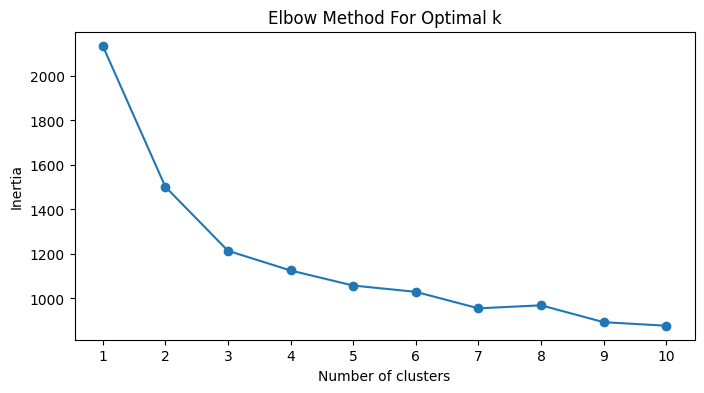

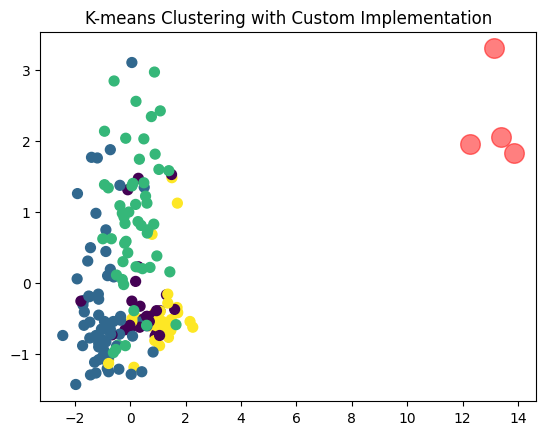

In [17]:
# Plotting the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

# Instantiate and fit KMeans with the chosen number of clusters
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal)
kmeans.fit(X_scaled)

# Visualization
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
centroids_scaled = scaler.inverse_transform(kmeans.centroids)  # If you wish to plot centroids in the original scale
plt.scatter(centroids_scaled[:, 0], centroids_scaled[:, 1], s=200, alpha=0.5, c='red')
plt.title("K-means Clustering with Custom Implementation")
plt.show()

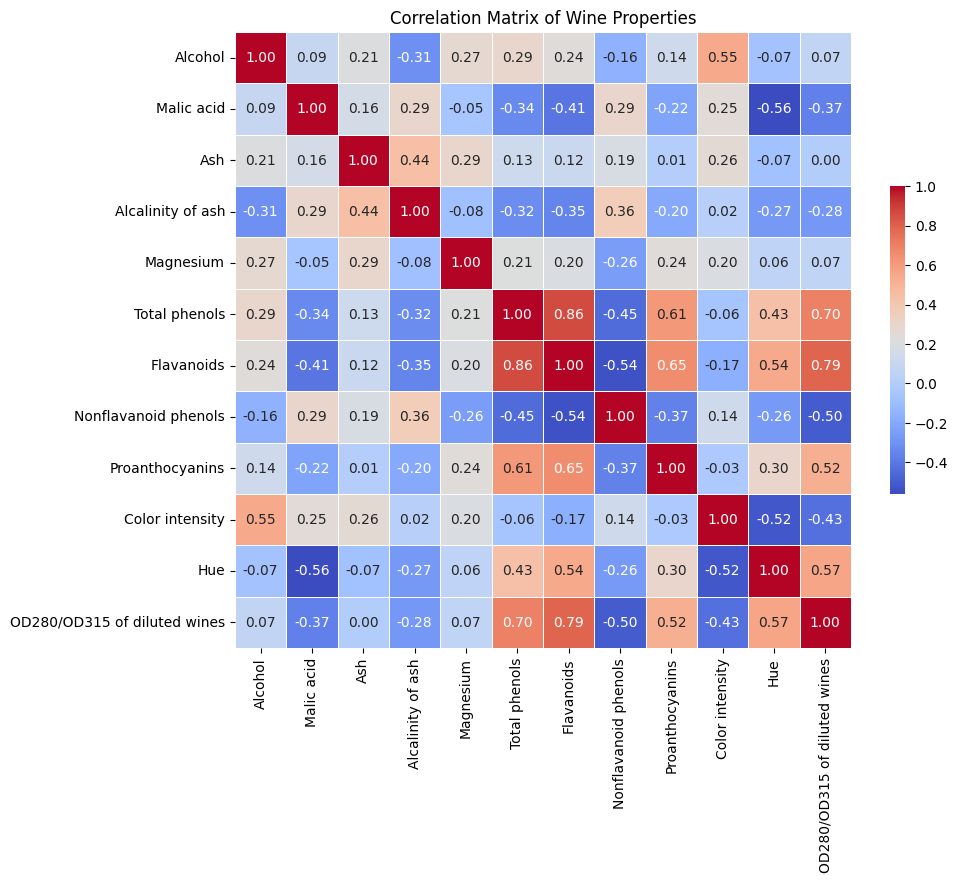

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = X.corr()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Wine Properties')
plt.show()


In [19]:
import pandas as pd

from sklearn.preprocessing import KBinsDiscretizer
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np


# Assuming X_scaled is your scaled dataset
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
X_binned = est.fit_transform(X_scaled)


# Convert the numpy array to a pandas DataFrame
X_binned_df = pd.DataFrame(X_binned)

# One-hot encode the binned data
X_binned_one_hot = pd.get_dummies(X_binned_df.astype(str))

# Finding frequent itemsets
frequent_itemsets = apriori(X_binned_one_hot, min_support=0.1, use_colnames=True)

# Generating association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)


# Sort the rules by descending confidence, then by descending support
sorted_rules = rules.sort_values(by=['confidence', 'support'], ascending=False)

# Select top N rules, for example, top 10
top_rules = sorted_rules.head(10)

# If you want to filter by a minimum threshold instead, you can do something like:
# high_confidence_rules = sorted_rules[(sorted_rules['confidence'] > 0.7) & (sorted_rules['support'] > 0.1)]

print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'leverage', 'conviction']])




                 antecedents consequents   support  confidence      lift  \
90           (4_1.0, 11_0.0)     (6_0.0)  0.101124    1.000000  3.955556   
197  (7_3.0, 10_0.0, 11_0.0)     (6_0.0)  0.101124    1.000000  3.955556   
171          (9_3.0, 11_0.0)    (10_0.0)  0.146067    0.962963  3.809053   
146           (6_0.0, 9_3.0)    (10_0.0)  0.129213    0.958333  3.790741   
152           (6_0.0, 9_3.0)    (11_0.0)  0.129213    0.958333  3.790741   
204   (6_0.0, 9_3.0, 10_0.0)    (11_0.0)  0.123596    0.956522  3.783575   
205   (6_0.0, 9_3.0, 11_0.0)    (10_0.0)  0.123596    0.956522  3.783575   
86            (5_3.0, 3_0.0)     (6_3.0)  0.117978    0.954545  3.775758   
134          (7_3.0, 10_0.0)     (6_0.0)  0.106742    0.950000  3.757778   
176   (6_0.0, 1_3.0, 10_0.0)    (11_0.0)  0.101124    0.947368  3.747368   

     leverage  conviction  
90   0.075559         inf  
197  0.075559         inf  
171  0.107720   20.174157  
146  0.095127   17.932584  
152  0.095127   17.9325

#### Analysis of Findings (K-Means)

Support: The support values range from 0.101124 to 0.146067, indicating that these itemsets appear in approximately 10% to 14.6% of the transactions. These are relatively modest frequencies, suggesting these rules are significant but not the most common patterns in the dataset.

Confidence: The confidence levels are very high (ranging from 0.947368 to 1.000000), suggesting that the likelihood of the consequents being bought with the antecedents is very high.

Lift: All the rules have a lift greater than 1 (ranging from 3.747 to 3.955), significantly higher than the baseline, indicating that the associations are indeed meaningful and not due to chance.

Leverage and Conviction: High leverage values indicate that the itemsets appear together more often than would be expected if they were independent. The conviction values, especially the infinite ones, suggest a very strong dependency between the antecedents and consequents.

### Association Rules

Import libraries

In [20]:
from ucimlrepo import fetch_ucirepo     # UCI dataset repo
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
import networkx as nx

Fetch "Online Retail" dataset from UCI

In [21]:
online_retail = fetch_ucirepo(id=352)       # UCI "Online Retail" dataset

# Data as pandas DataFrames
X = online_retail.data.features

# Metadata and variable information
print(online_retail.metadata)
print(online_retail.variables)

{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining', 'aut

Preprocess data

In [22]:
X_clean = X.dropna(subset=['CustomerID', 'Description']).copy()
X_clean['CustomerID'] = X_clean['CustomerID'].astype(str)

# Prepare customer-based transactions
customer_transactions = X_clean.groupby('CustomerID')['Description'].apply(list).tolist()

# Convert transactions for Apriori
te = TransactionEncoder()
te_ary = te.fit(customer_transactions).transform(customer_transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

Find frequent itemsets w/ Apriori algorithm

In [23]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

Generate association rules

In [24]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Calculate Zhang's metric
rules['zhang'] = rules.apply(lambda row: (row['confidence'] - row['consequent support']) / (max(row['confidence'], row['consequent support']) - row['consequent support']), axis=1)

# Set the option to display all columns
pd.set_option('display.max_columns', None)

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhang']].sort_values(by='lift', ascending=False))

                                           antecedents  \
131  (GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKE...   
136  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...   
128  (ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...   
138                   (PINK REGENCY TEACUP AND SAUCER)   
132  (PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...   
..                                                 ...   
31                           (LUNCH BAG PINK POLKADOT)   
32                           (LUNCH BAG RED RETROSPOT)   
83                                    (SPOTTY BUNTING)   
90                        (SET OF 3 REGENCY CAKE TINS)   
17                             (HEART OF WICKER LARGE)   

                                           consequents   support  confidence  \
131  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...  0.051693    0.753333   
136  (GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKE...  0.051693    0.827839   
128                   (PINK REGENCY TEACUP AND SAUCER)  0.05169

Analysis + visualization of association rules

Average Metrics:
support       0.058380
confidence    0.683867
lift          6.899042
leverage      0.048731
conviction    3.648251
zhang         1.000000
dtype: float64


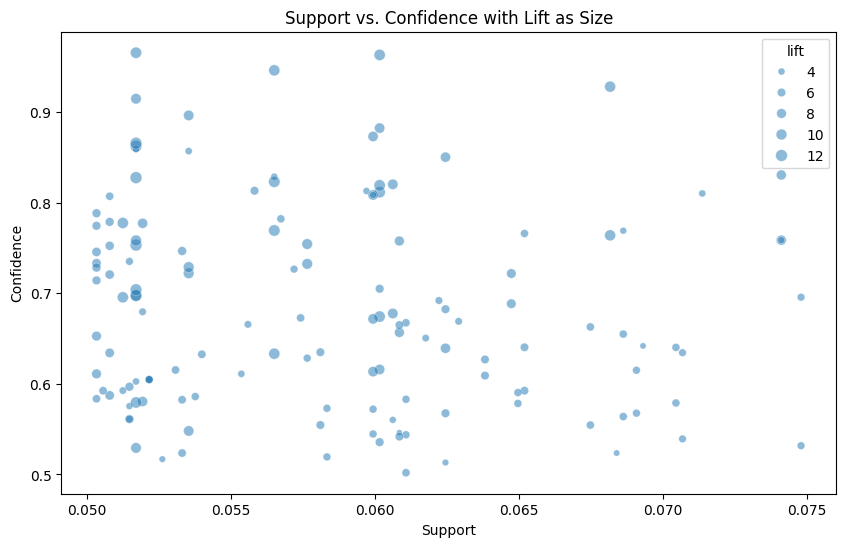

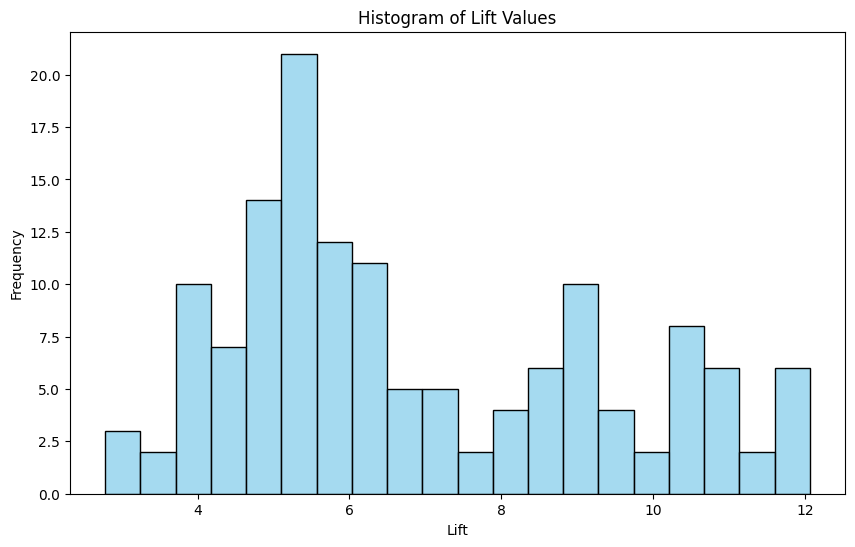

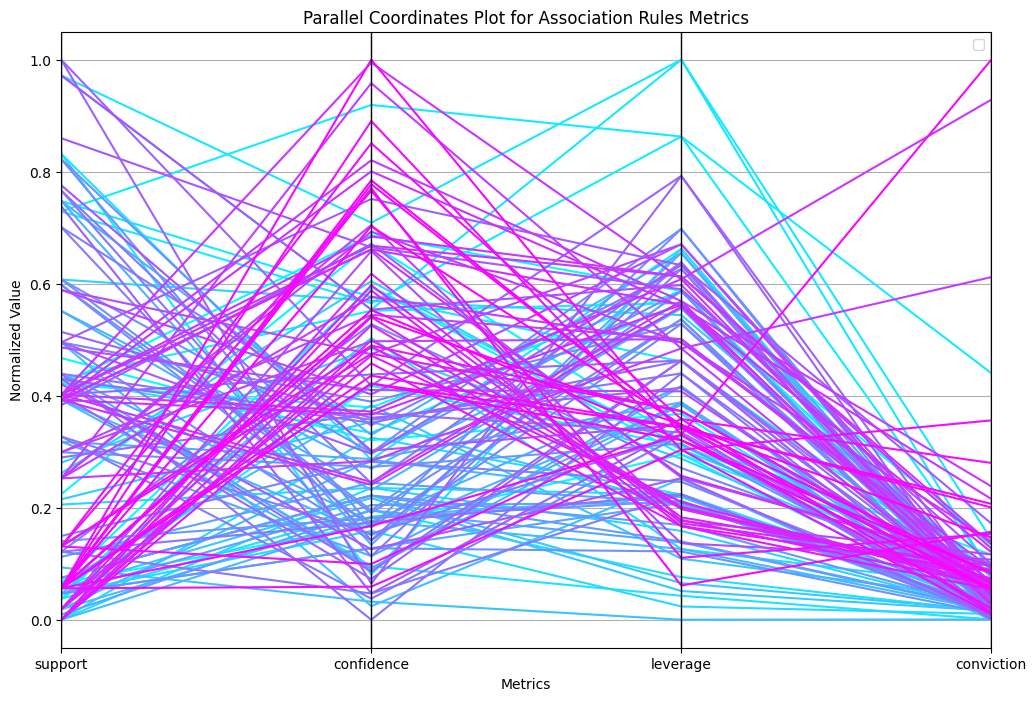

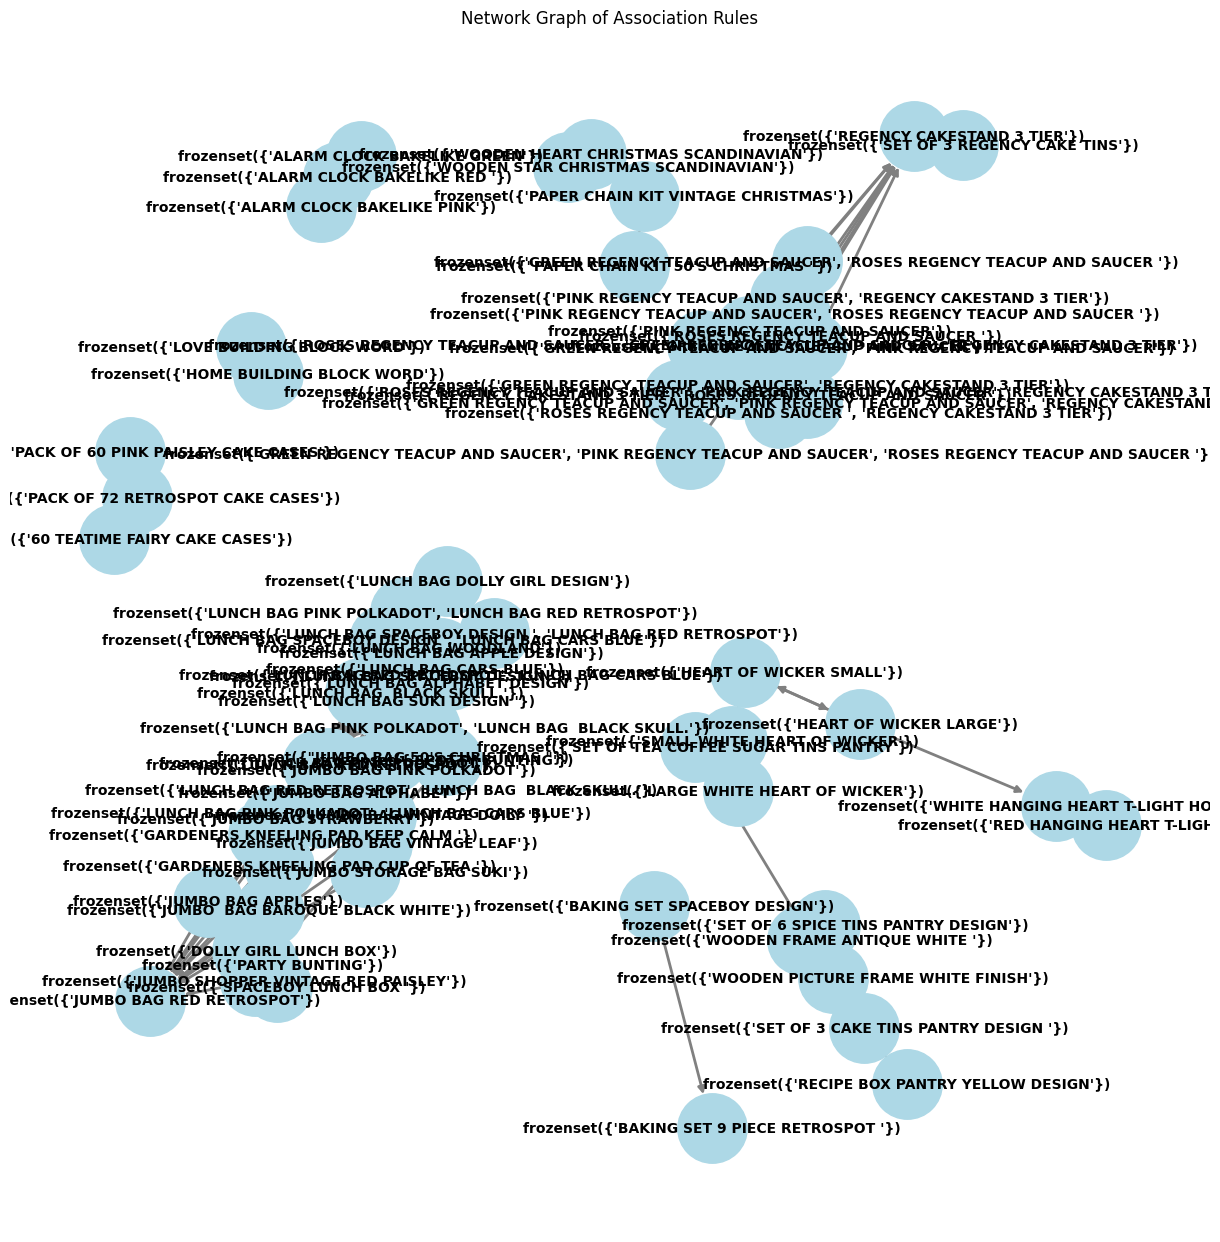

In [25]:
# Calculate the average of the metrics
average_metrics = rules[['support', 'confidence', 'lift', 'leverage', 'conviction', 'zhang']].mean()

# Print the average of the metrics
print("Average Metrics:")
print(average_metrics)

# Scatter Plot of Support vs. Confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules, alpha=0.5)
plt.title('Support vs. Confidence with Lift as Size')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Histogram of Lift
plt.figure(figsize=(10, 6))
sns.histplot(rules['lift'], bins=20, kde=False, color='skyblue')
plt.title('Histogram of Lift Values')
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.show()

# Parallel Coordinates Plot for Association Rules
plt.figure(figsize=(12, 8))
parallel_coordinates(rules[['support', 'confidence', 'lift', 'leverage', 'conviction']].apply(lambda x: (x - x.min()) / (x.max() - x.min())), 'lift', colormap='cool')
plt.title('Parallel Coordinates Plot for Association Rules Metrics')
plt.xlabel('Metrics')
plt.ylabel('Normalized Value')
plt.legend([])
plt.show()

# Network Graph of Association Rules
G = nx.DiGraph()
for _, row in rules.iterrows():
    G.add_edge(str(row['antecedents']), str(row['consequents']), weight=row['lift'])

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw(G, pos, with_labels=True, node_size=2500, node_color='lightblue', font_size=10, font_weight='bold', edge_color='grey', width=2)
plt.title("Network Graph of Association Rules")
plt.show()

#### Analysis of Findings (Association Rules)

Metrics:

        - Support (0.058380): This can be interpreted as the itemsets appearing together in ~5.84% of the transactions on average. This suggests that the frequent itemsets identified in our Apriori algorithm is relatively specific and while its not extremely common, these associations are significant enough to be considered relevant for the dataset's scale.

        - Confidence (0.683867): This can be interpreted as an average 68.39% confidence level in the rules. This is a strong indicator that, on average, when the antecedent is bought, there is a high likelihood that the consequent will also be bought, suggesting that the rules we've identified are pretty reliable for predicting consequent purchases based on antecedent items.

        - Lift (6.899042): Since our lift value is much greater than 1, it is implied that the presence of the antecedent in a transaction is highly likely to increase the likelihood of the consequent being in the same transaction.

        - Leverage (0.048731): This means that the itemsets appear together more often than they would if they were independent by ~4.87%. Positive leverages indicate that there is usually a positive association between item pairs in the rules (they occur together more frequently than expected if they were independent).

        - Conviction (3.648251): This means that the consequent is ~3.65x more likely to be purchased when the antecedent is bought compared to when the antecedent is not bought. This indicates that the rules have a strong predictive power and are not just capturing frequent patterns but also a strong dependency of the consequents on the antecedents. In other words, it suggests that the rules we have are robust and can be considered reliable for making decisions or predictions.

        - Zhang (1): A value of 1 with Zhang's metric suggests perfect certainty (or at the very least a very strong directional relationship) in our rules. However, this perfect value could be a fluke and needs further investigation.

### References

Datasets: 

    - https://www.kaggle.com/datasets/tawfikelmetwally/wine-dataset
    
    - Chen,Daqing. (2015). Online Retail. UCI Machine Learning Repository. https://doi.org/10.24432/C5BW33.

ChatGPT

CS courses Padlet: https://padlet.com/isac_artzi/cs-courses-97zpvui7fpar